In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn import linear_model, preprocessing

In [2]:
% matplotlib inline

In [3]:
# load dataset
data = pd.read_csv("data/auto-mpg.data-original", delim_whitespace = True, header = None)
# Add column headings
data.columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [4]:
# Sample the data
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


#### This dataset focuses on fuel consumption of different types of vehicles. The first column is the MPG (miles per gallon) and will be our Y variable. All remaining columns will be our training data, X. We will fit our training data via a linear regression model.

#### We will also convert the Car Name labels into integer values because we can't operate on string values. We can use the LabelEncoder() method from sklearn for conversion

In [5]:
# Converting labels to integer values
le = preprocessing.LabelEncoder()
# labels = X.iloc[:, 7]
labels = data.iloc[:, 8]
le.fit(labels)
data.iloc[:, 8] = le.transform(labels)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,50
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,37
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,235
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,14
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,164


In [6]:
# get shape of data
number_of_nan = sum(pd.isnull(data).sum()) # get number of nan values
print("The Shape of the data: {} x {}".format(data.shape[0], data.shape[1]))
print("Number of NaN values: {}".format(number_of_nan))

The Shape of the data: 406 x 9
Number of NaN values: 14


In [7]:
# Remove NaN values and analyze
data_dropna = data.dropna()
X = data_dropna.iloc[:, 1:9] # Last row is text of vehicle type
Y = data_dropna.iloc[:, 0]
print("The Shape of the data when NaN is removed: {} x {}".format(data_dropna.shape[0], data_dropna.shape[1]))

The Shape of the data when NaN is removed: 392 x 9


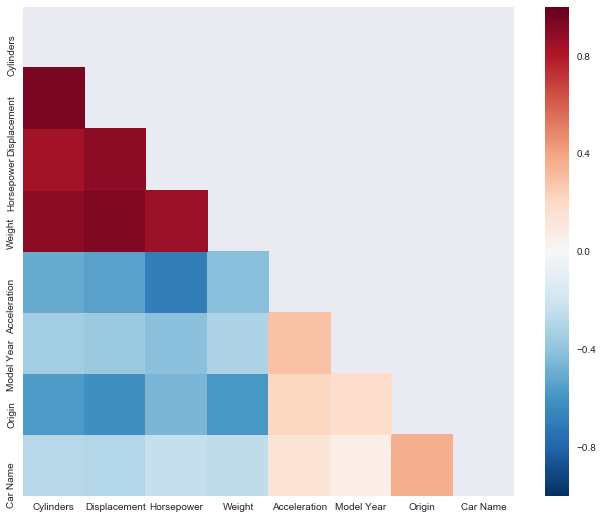

In [8]:
# Create the cross correlation matrix
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Adjust Figure Size
plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask = mask)

In [9]:
linreg_model = linear_model.LinearRegression()
linreg_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
R2_dropna = linreg_model.score(X,Y)
print("The Rsquared score using 392 training samples is: {}".format(R2_dropna))

The Rsquared score using 392 training samples is: 0.8228856293486634


In [11]:
# random.seed(2)
indices = random.sample(range(0, 392), 10)
print("Random sample indexes chosen to evaluate predictions: {}".format(indices))

Random sample indexes chosen to evaluate predictions: [144, 133, 259, 322, 6, 55, 220, 229, 19, 311]


In [12]:
Yhat_samples = linreg_model.predict(X.iloc[indices, :])
Y_samples = list(Y.iloc[indices])
print("Predictions based on our model: {}".format(Yhat_samples))
print("Actuals: {}".format(Y_samples))

Predictions based on our model: [ 25.58762665  17.77788296  21.62960005  33.19746745  10.51044005
  25.45693244  16.88403804  15.68164211  27.53467848  27.47816586]
Actuals: [28.0, 18.0, 18.100000000000001, 40.799999999999997, 14.0, 26.0, 17.0, 15.5, 26.0, 28.0]


In [13]:
params = linreg_model.get_params

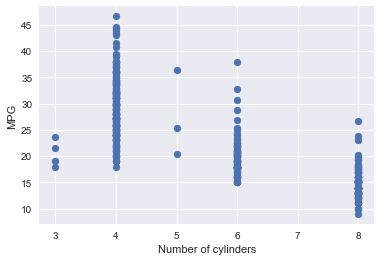

In [14]:
plt.scatter(X.iloc[:,0], Y)
plt.xlabel("Number of cylinders")
plt.ylabel("MPG")
plt.show()

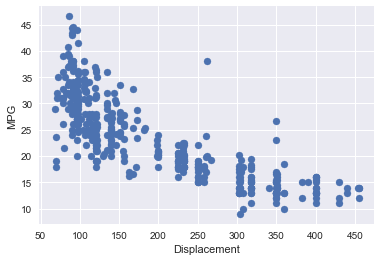

In [15]:
plt.scatter(X.iloc[:,1], Y)
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

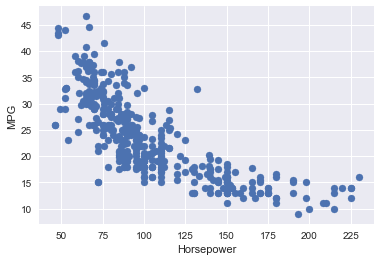

In [16]:
plt.scatter(X.iloc[:,2], Y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

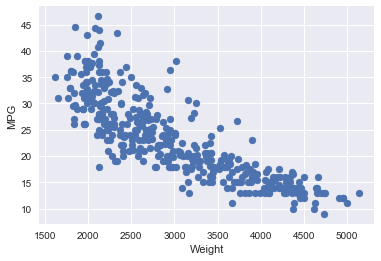

In [17]:
plt.scatter(X.iloc[:,3], Y)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

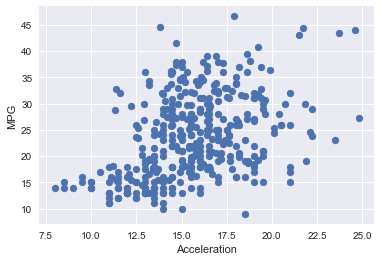

In [18]:
plt.scatter(X.iloc[:,4], Y)
plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.show()

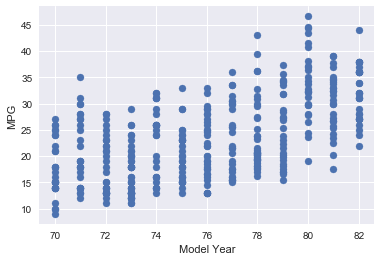

In [19]:
plt.scatter(X.iloc[:,5], Y)
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()

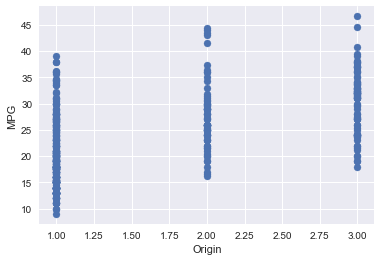

In [20]:
plt.scatter(X.iloc[:,6], Y)
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.show()

In [21]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
for cn in column_names:
    data[cn] = data[cn].fillna(np.median(data_dropna[cn]))
    
print("Finished converting Na values to Median values")

number_of_nan = pd.isnull(data).sum().sum() # get number of nan values
print("The number of Na values remaining in the data dataframe is: {}".format(number_of_nan))

Finished converting Na values to Median values
The number of Na values remaining in the data dataframe is: 0


In [22]:
X = data.iloc[:, 1:9]
Y = data.iloc[:, 0]

In [23]:
linreg_model.fit(X, Y)
R2_full = linreg_model.score(X, Y)
print("The Rsquared score using 405 training samples is: {}".format(R2_full))

The Rsquared score using 405 training samples is: 0.7993542978598022


#### We can also calculate the R2 values using different features

In [24]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
for i in range(len(column_names)):
    X = data.iloc[:, i:i+1]
    linreg_model.fit(X, Y)
    R2 = linreg_model.score(X, Y)
    print("The Rsquared score between " + column_names[i] + " and mpg is: {}".format(R2))

The Rsquared score between MPG and mpg is: 1.0
The Rsquared score between Cylinders and mpg is: 0.5833809041340214
The Rsquared score between Displacement and mpg is: 0.6279702617151348
The Rsquared score between Horsepower and mpg is: 0.5800354490984115
The Rsquared score between Weight and mpg is: 0.6794371046599968
The Rsquared score between Acceleration and mpg is: 0.1689006163169854
The Rsquared score between Model Year and mpg is: 0.3225627750488007
The Rsquared score between Origin and mpg is: 0.315260050952358
